In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


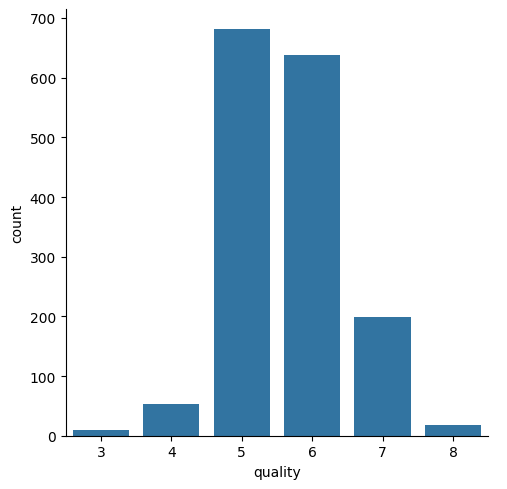

In [7]:
# creating a visualization  for quality
sns.catplot(x='quality', data=data, kind='count')

In [8]:
data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


<Axes: xlabel='quality', ylabel='volatile acidity'>

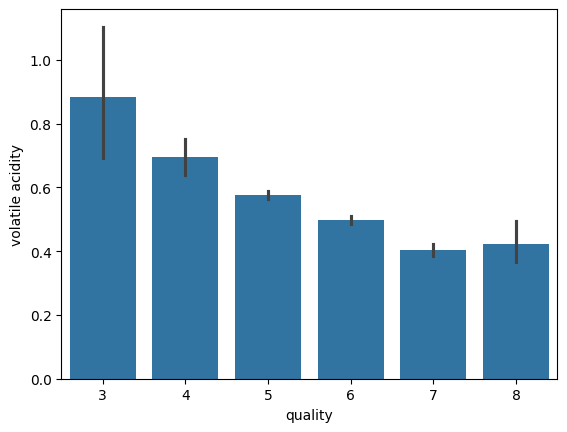

In [9]:
sns.barplot(x='quality', y='volatile acidity', data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

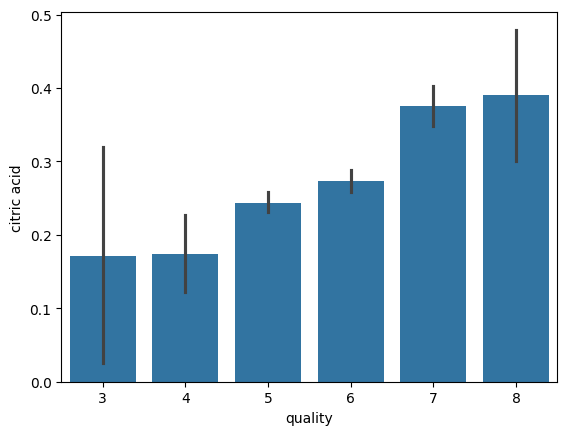

In [10]:
sns.barplot(x='quality', y='citric acid', data=data)

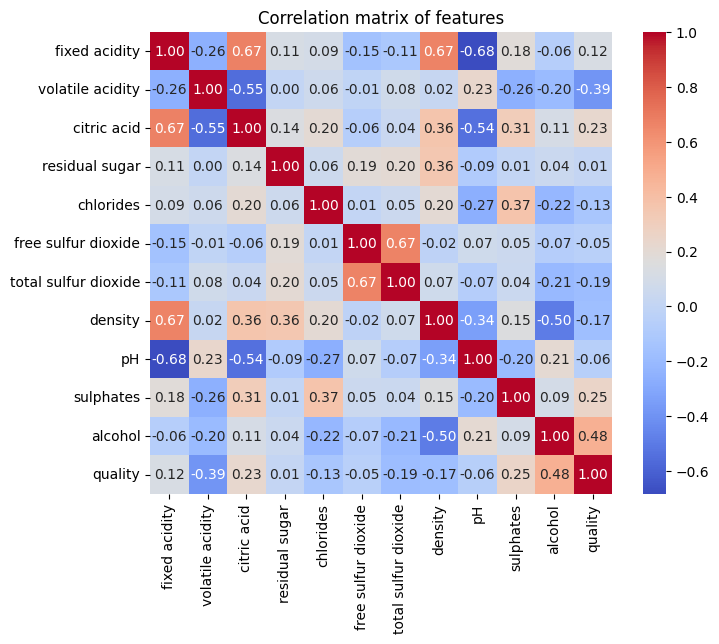

In [11]:
correlation_matrix = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
          'density', 'pH', 'sulphates', 'alcohol', 'quality']].corr()
# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation matrix of features')
plt.show()

In [12]:
X = data.drop(['quality'], axis=1)
y = data['quality']

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
def binarization(i):
    if i >= 7:
      return 1
    else:
      return 0

In [15]:
y_try = y.apply(binarization)

In [16]:
y_try

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [17]:
y_try.value_counts()

,count
quality,
0,1382
1,217


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_try, random_state=3, test_size=0.2)

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [21]:
acc = accuracy_score(y_train, pred)
acc

1.0

In [26]:
X_new = np.array([[8.2,	0.590,	0.00,	2.5,	0.093,	19.0,	58.0,	1.00020,	3.50,	0.65,	9.3]])
X_new

array([[ 8.2   ,  0.59  ,  0.    ,  2.5   ,  0.093 , 19.    , 58.    ,
         1.0002,  3.5   ,  0.65  ,  9.3   ]])

In [27]:
yhat_new = model.predict(X_new)
print(yhat_new)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
model.estimators_[:3]

[DecisionTreeClassifier(max_features='sqrt', random_state=212103766),
 DecisionTreeClassifier(max_features='sqrt', random_state=1463086322),
 DecisionTreeClassifier(max_features='sqrt', random_state=732856087)]

In [23]:
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.934375

In [24]:
classification = classification_report(y_test, pred)
print(classification)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       283
           1       0.83      0.54      0.66        37

    accuracy                           0.93       320
   macro avg       0.89      0.76      0.81       320
weighted avg       0.93      0.93      0.93       320

